In [1]:
import numpy as np

Una medida generaliza es un conjunto de operadores $M_j$ que satisfacen $\sum_j M_j^\dagger M_j = I$. A los operadores $E_j=M_j^\dagger M_j $ son llamados elementos de POVM.

In [2]:
def random_generalized_measurement():
    
    Z0 = np.random.randn(2,2) + 1j*np.random.randn(2,2)
    Z0, _ = np.linalg.qr(Z0)
    
    Z1 = np.random.randn(2,2) + 1j*np.random.randn(2,2)
    Z1, _ = np.linalg.qr(Z1)
    
    M0 = Z0@np.array([ [1,0], [0,0] ])
    M1 = Z1@np.array([ [0,0], [0,1] ])
    
    return M0, M1

In [43]:
def random_quantum_state():
    z0 = np.random.randn(2) + 1j*np.random.randn(2)
    z0 = z0/np.linalg.norm(z0)
    return z0

In [3]:
M0, M1 = random_generalized_measurement()

In [4]:
M0.T.conj()@M0 + M1.T.conj()@M1

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [5]:
V0, D0, U0 = np.linalg.svd(M0) 
V1, D1, U1 = np.linalg.svd(M1) 

In [6]:
U0, U1

(array([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]),
 array([[-0.       +0.j        ,  0.5632297+0.82630037j],
        [-1.       +0.j        , -0.       +0.j        ]]))

In [7]:
V0, V1

(array([[-0.02651613-0.08508753j,  0.1439026 +0.98557042j],
        [ 0.30421085-0.94842647j,  0.04016374-0.07956046j]]),
 array([[ 0.46222504+0.j        , -0.88676266+0.j        ],
        [-0.88217385+0.09009613j, -0.45983312+0.04696261j]]))

In [8]:
D0, D1

(array([1., 0.]), array([1., 0.]))

In [9]:
np.linalg.svd(M0) 

(array([[-0.02651613-0.08508753j,  0.1439026 +0.98557042j],
        [ 0.30421085-0.94842647j,  0.04016374-0.07956046j]]),
 array([1., 0.]),
 array([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]))

In [91]:
from qiskit import QuantumCircuit, Aer
from qiskit.compiler import transpile

In [25]:
qc_v1 = QuantumCircuit(1)
qc_v1.unitary(  V0, 0 )
qc_v2 = QuantumCircuit(1)
qc_v2.unitary(  V1, 0 )

In [69]:
qc = QuantumCircuit(2,1)
qc.unitary( U0,  0)
qc.x(0)
qc.cry( 0, 0, 1 )
qc.x(0)
qc.cry( 0, 0, 1 )
qc.compose( qc_v1.control(1) , [0,1], inplace=True )
qc.compose( qc_v2.control(1) , [0,1], inplace=True )
qc.measure(1,0)

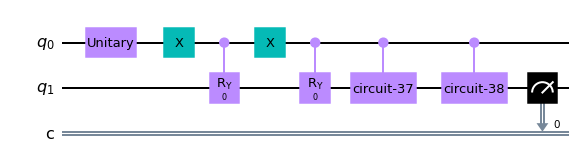

In [70]:
qc.draw(output='mpl')

In [44]:
ψ = random_quantum_state()
ϕ = random_quantum_state()

In [45]:
np.vdot(ψ,ϕ)

(0.8052179677800013-0.29927275990223545j)

In [76]:
qc_ψ = QuantumCircuit(2,1)
qc_ψ.initialize( ψ, 0 )
qc_ψ.compose( qc, qubits=[0,1], clbits=[0], inplace=True )

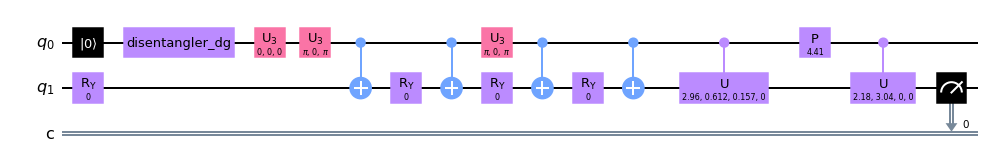

In [77]:
qc_ψ.decompose().draw(output='mpl')

In [79]:
qc_ϕ = QuantumCircuit(2, 1)
qc_ϕ.initialize( ϕ, 0 )
qc_ϕ.compose( qc, qubits=[0,1], clbits=[0], inplace=True )

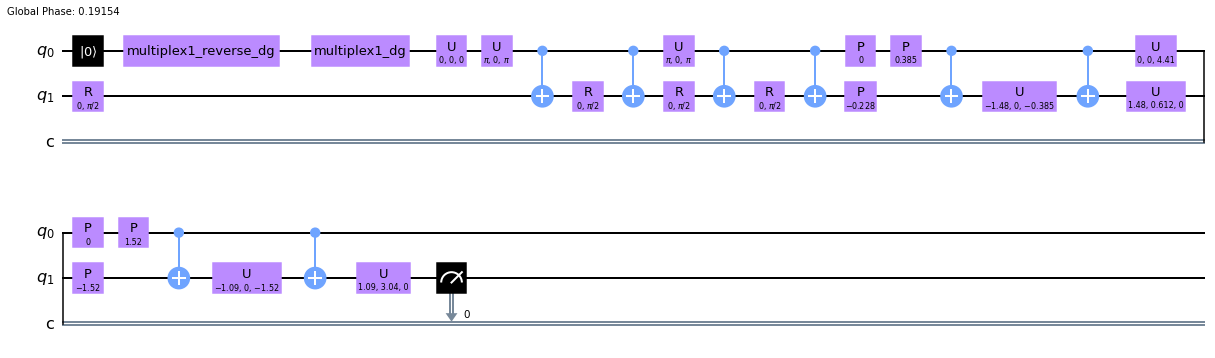

In [96]:
qc_ϕ.decompose().decompose().draw(output='mpl')

In [82]:
backend_sim = Aer.get_backend('aer_simulator')

In [98]:
qc_ψ = transpile(qc_ψ, backend_sim)
results_ψ = backend_sim.run( qc_ψ )

In [99]:
qc_ϕ = transpile(qc_ψ, backend_sim)
results_ϕ = backend_sim.run( qc_ϕ )